# Predicting Titanic Survival with Machine Learning

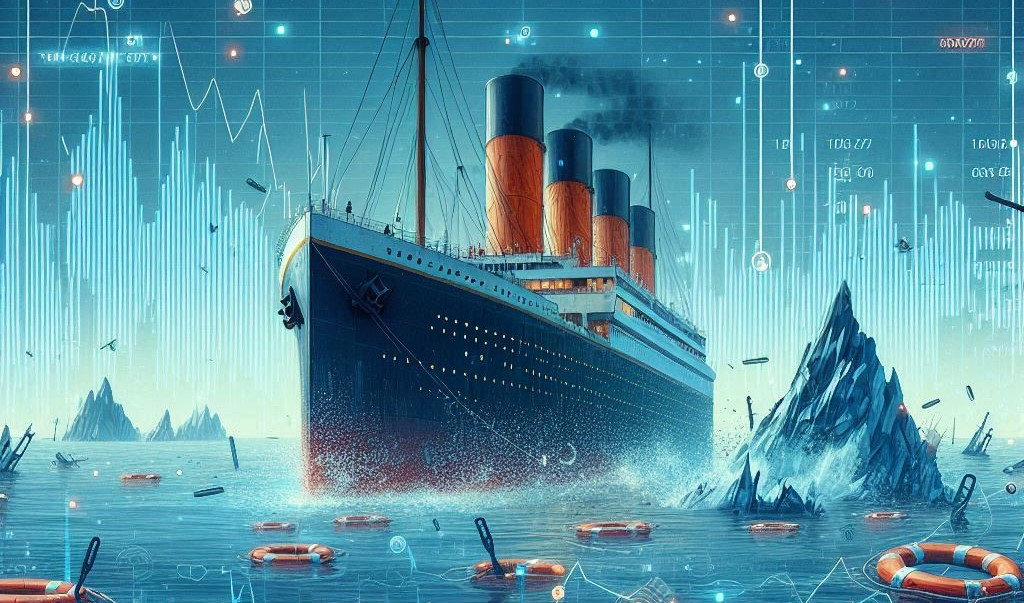

The sinking of the RMS Titanic in 1912 remains one of the most tragic maritime disasters in history. In this machine learning project, the aim is to predict whether passengers aboard the Titanic survived or perished based on various features such as age, gender, ticket class, and family size.

### Dataset Overview
Our dataset contains information about 891 passengers, including:

- Survived:    Binary label (0 for not survived, 1 for survived)
- Pclass:  Ticket class (1st, 2nd, or 3rd)
- Sex: Gender (male or female)
- Age: Passenger age
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard
- Fare: Ticket fare
- Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Approach
- Data Exploration: We’ll analyze the dataset, handle missing values, and visualize key features.
- Feature Engineering: Create new features (e.g., family size) and preprocess existing ones.
- Model Selection: Experiment with various classifiers (e.g., logistic regression, decision trees, random forests).
- Model Training and Evaluation: Train models, tune hyperparameters, and evaluate performance using cross-validation.
- Prediction: Apply the best model to predict survival outcomes for the test dataset.

In [114]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
#loading the dataset
train = pd.read_csv("titanic_train.csv")

In [116]:
#viewing the first few rows of the data
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [117]:
#inspecting the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


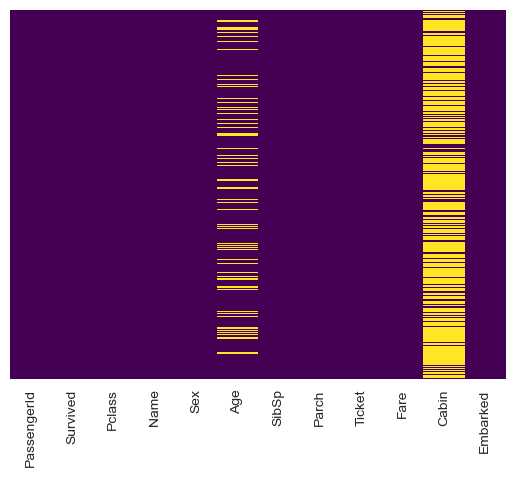

In [118]:
#using seaborn to visualize where missing data occurs most
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.show()

We observe from the above visual that a lot of data in the 'Cabin' column and a considerable amount of data in the 'Age' column are missing. We might need to drop the 'Cabin' column and impute values values in the 'Age' column when necessary

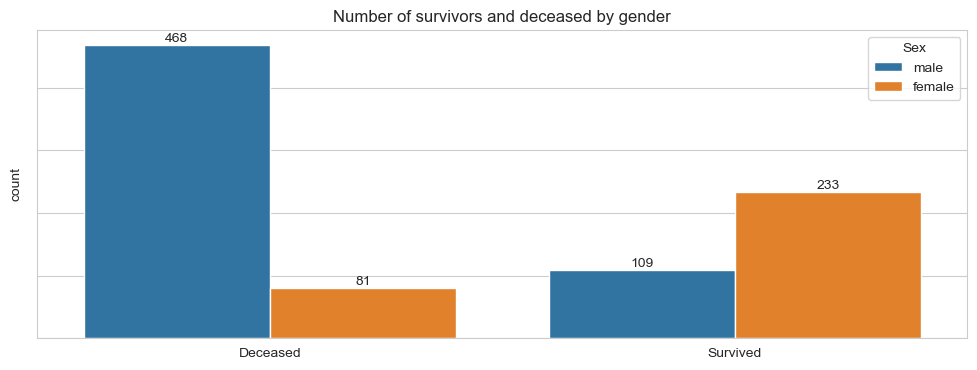

In [119]:
#visualizing the number of survivors and deceased by gender
plt.figure(figsize=(12,4))
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',hue='Sex', data = train)

#setting chart labels
plt.title("Number of survivors and deceased by gender")
ax.set_xticklabels(["Deceased", "Survived"])
plt.xlabel('')

#data labels
for container in ax.containers:
    ax.bar_label(container)
ax.set_yticklabels([])

plt.show()

The above plot indicates that majority of the deceased (468) were male with 81 being female. On the other hand, majority of the survivors (233) were female with 109 being male.

In [120]:
#converting the passenger class column to category
train['Pclass'] = train['Pclass'].astype('string')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    string 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5), string(1)
memory usage: 83.7+ KB


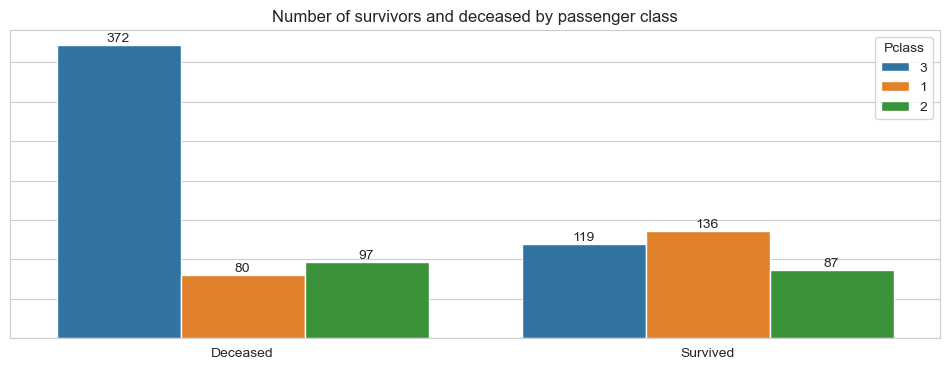

In [121]:
#visualizing the number of survivors and deceased by Passenger class
plt.figure(figsize=(12,4))
ax = sns.countplot(x='Survived', hue='Pclass', data = train)

plt.title("Number of survivors and deceased by passenger class")
ax.set_xticklabels(["Deceased", "Survived"])
plt.xlabel('')
plt.ylabel('')

#data labels
for container in ax.containers:
    ax.bar_label(container)
ax.set_yticklabels([])

plt.show()

There were three classes of passengers: First, Second and Third Classes. The First Class was the most expensive, mostly purchased by the elite. The Second Class was moderate and the Third Class was the cheapest. 372 (67.76%) out of the 549 total deceased were in the Third Class. Conversely, 136 (39.77%) of the survivors were in the First Class with 119 (34.8%) being in the Third Class

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, "Passengers' Age Distrinution")

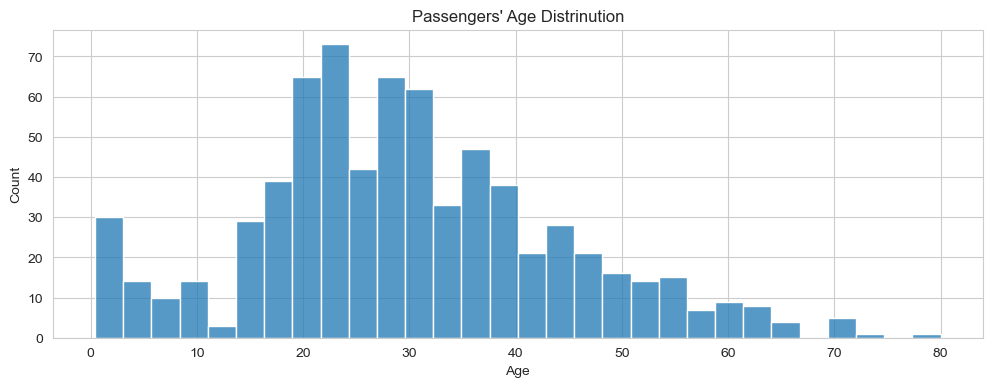

In [122]:
#visualising passenger distribution by age, excluding the nulls
plt.figure(figsize=(12,4))
sns.histplot(train['Age'].dropna(), bins=30)

plt.title("Passengers' Age Distrinution")

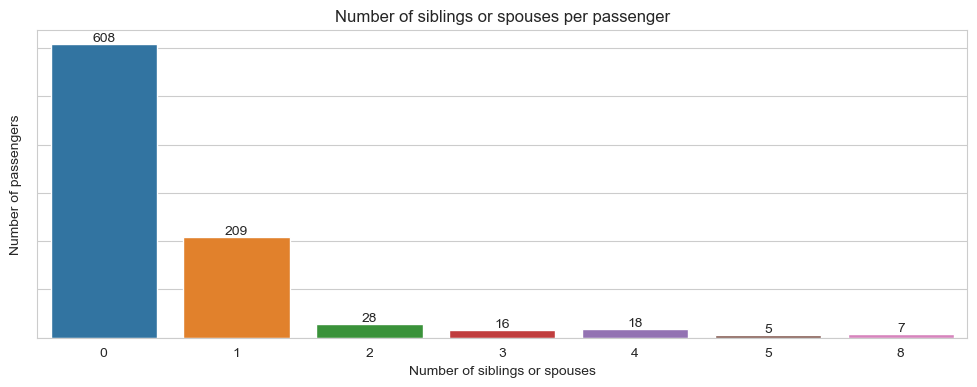

In [123]:
#checking the number of passengers who had siblings or spouses on board
plt.figure(figsize=(12,4))

ax = sns.countplot(x='SibSp', data=train)
ax.set_xlabel('Number of siblings or spouses')
ax.set_ylabel('Number of passengers')

#data labels
for container in ax.containers:
    ax.bar_label(container)
ax.set_yticklabels([])

plt.title('Number of siblings or spouses per passenger')

plt.show()

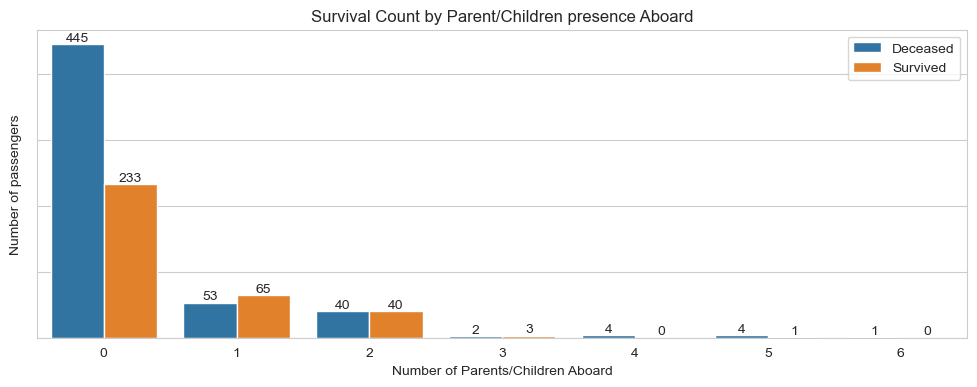

In [124]:
#converting Survived column to string to allow for aggregation
train['Survived'] = train['Survived'].astype('string')
plt.figure(figsize=(12,4))


#plotting survival count by parent/children presence aboard
ax=sns.countplot(x='Parch', data=train, hue="Survived")
plt.legend(loc='upper right', labels=['Deceased', 'Survived'])
plt.title('Survival Count by Parent/Children presence Aboard')
ax.set_xlabel('Number of Parents/Children Aboard')
ax.set_ylabel('Number of passengers')

for container in ax.containers:
    ax.bar_label(container)
ax.set_yticklabels([])

plt.show()

We observe from the above chart that 68.2% of the passengers had no spouses or siblings. These are most likely to be young people

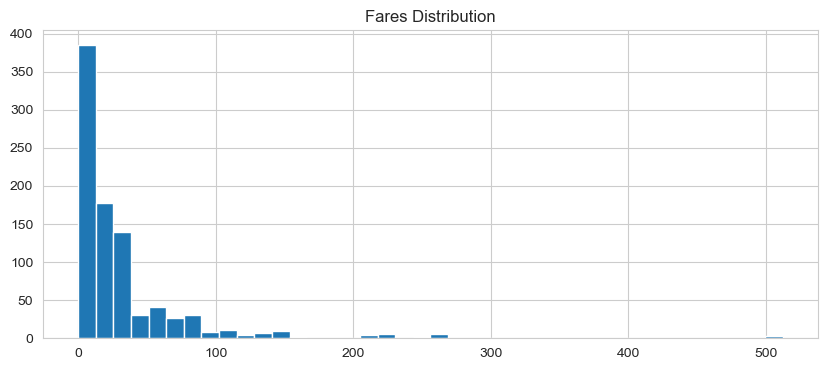

In [125]:
#checking the fares distribution
plt.figure(figsize=(12,4))
train['Fare'].hist(bins=40, figsize=(10,4))
plt.title("Fares Distribution")

plt.show()

### Filling in missing data in the "Age" column

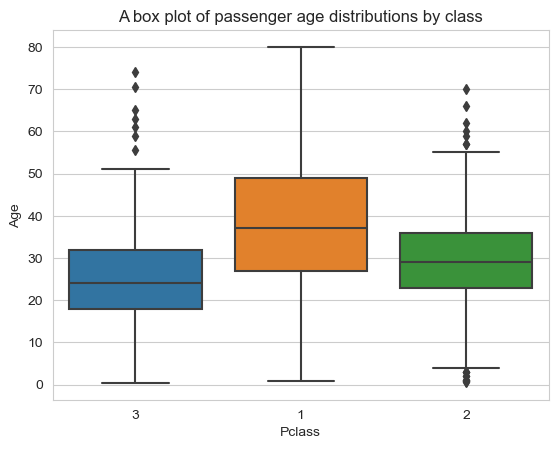

In [126]:
#visualizing average ages by passenger class
sns.boxplot(x='Pclass', y='Age', data=train)

plt.title("A box plot of passenger age distributions by class")

plt.show()

In [127]:
#define a function to get the mean age for each passenger class
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [128]:
#apply the function on your age column
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<Axes: >

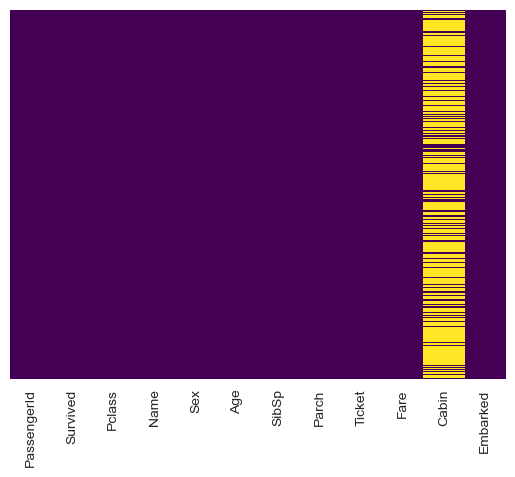

In [129]:
#checking to see the outcome of mean imputation
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [130]:
#the cabin column is dropped since it has too many missing values
#it can't be utilized for any meaningful analysis
train.drop('Cabin', axis=1, inplace=True)

In [131]:
#dropping any more missing values
train.dropna(inplace=True)

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    string 
 2   Pclass       889 non-null    string 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(4), string(2)
memory usage: 83.3+ KB


In [133]:
#converting string and class columns into categories
train['Sex'] = train['Sex'].astype('category').cat.codes
train['Embarked'] = train['Embarked'].astype('category').cat.codes
train['Pclass'] = train['Pclass'].astype('category').cat.codes

### Machine Learning Model

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression Model

In [135]:
X = train[['Pclass','Embarked','Sex','Age','SibSp','Parch','Fare']]

In [136]:
y = train['Survived']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [138]:
logreg = LogisticRegression()

In [139]:
logreg.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_pred = logreg.predict(X_test)

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



#### Decision Tree Model

In [142]:
label_encoder = LabelEncoder()
train["Sex"] = label_encoder.fit_transform(train["Sex"])
train["Embarked"] = label_encoder.fit_transform(train["Embarked"])

In [143]:
X = train[['Pclass','Embarked','Sex','Age','SibSp','Parch','Fare']]
y = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [144]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [145]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       124
           1       0.58      0.74      0.65        54

    accuracy                           0.76       178
   macro avg       0.73      0.75      0.73       178
weighted avg       0.78      0.76      0.77       178



#### Random Forest Classifier

In [146]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=102)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [147]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       124
           1       0.68      0.78      0.72        54

    accuracy                           0.82       178
   macro avg       0.79      0.81      0.80       178
weighted avg       0.83      0.82      0.82       178

